In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [11]:
def g1(x):
    g = (1+x)/(1+np.exp(x))
    return g
#We might need to use the same method again so we name this g 'g1'
#We also use the code gg to show the first derivative and ggg to show the second one
def g1g(x):
    g = -(x*np.exp(x)-1)/((np.exp(x)+1)**2)
    return g
def g1gg(x):
    g = np.exp(x)*((x-1)*np.exp(x)-x-3)/((np.exp(x)+1)**3)
    return g
    

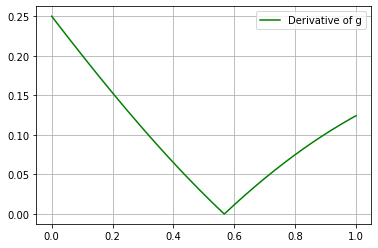

In [12]:
xpoints = np.linspace(0,1,1000) 
gpoints = abs(g1g(xpoints))

plot1 = plt.plot(xpoints, gpoints, color ='green', label ="Derivative of g")
plt.grid(True)
plt.legend()
plt.show(plot1)

In [13]:
#Let's code then
#Since the problem doesn't specify an acceptable error we shall put as a variable the desired number of iterations.

def fixpoint(x0,N):
    solution =[x0]
    It = [0]
    for n in range (0,N):
        It.append(n+1)
        x0 = g1(x0)
        solution.append(x0)
    print("Iterations:", (len(It)-1), "while we were given:", N)
    print("Solutions:", (len(solution)-1))
    
    
    L = len(solution)
    root = solution[L-1]
    dgdx = g1g (root)
    print("The solution is:", root)
    print("Last Error:", solution[L-1]-solution[L-2])
    
    error_n = np.array([solution[L-1]-solution[0]])
    error_np1 = np.array([solution[L-1]-solution[1]])

    for i in range (1,L-1):
        error_n = np.append(error_n, [solution[L-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[L-1]-solution[i+1]])

    error_np1_predict = dgdx*error_n

    fig, ax = plt.subplots()
    ax.plot(abs(error_n), abs(error_np1_predict), label = "predicted error", color = "orange")
    ax.plot(abs(error_n),abs(error_np1), label="actual error", color = "green")
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.legend()
    ax.set(xlabel='error_n', ylabel='error_n+1')
    plt.xlim(left= (10**(-10)))
    ax.grid()
    plt.show()

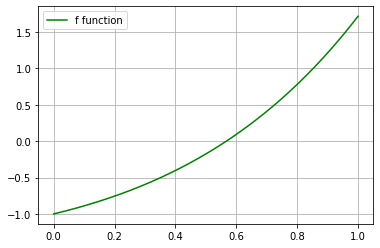

In [14]:
def f1(x):
    f=x*np.exp(x)-1
    return f
xpoints = np.linspace(0,1,1000) 
fpoints = f1(xpoints)

plot1 = plt.plot(xpoints, fpoints, label = 'f function', color = "green")
plt.legend()
plt.grid(True)
plt.show(plot1)

Let's start with N = 8 iterattions
Iterations: 8 while we were given: 8
Solutions: 8
The solution is: 0.5671432904097838
Last Error: 0.0


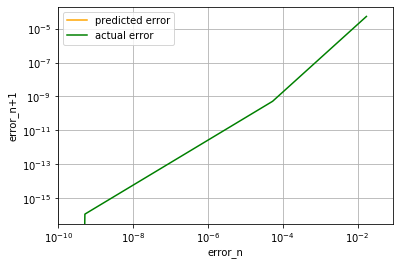

In [15]:
print("Let's start with N = 8 iterattions") 
x0 = 0.55
fixpoint(x0,8)

Let's continue with N = 5 iterattions
Iterations: 5 while we were given: 5
Solutions: 5
The solution is: 0.5671432904097838
Last Error: 0.0


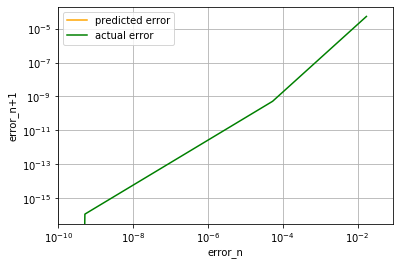

In [16]:
print("Let's continue with N = 5 iterattions") 
fixpoint(x0,5)

Let's continue with N = 15 iterattions
Iterations: 15 while we were given: 15
Solutions: 15
The solution is: 0.5671432904097838
Last Error: 0.0


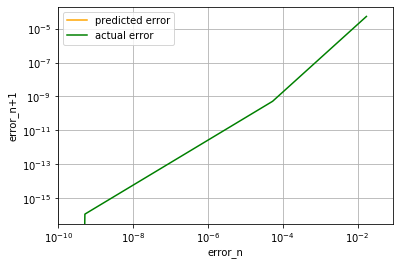

In [17]:
print("Let's continue with N = 15 iterattions") 
fixpoint(x0,15)

Let's continue with N = 3 iterattions
Iterations: 3 while we were given: 3
Solutions: 3
The solution is: 0.5671432904097837
Last Error: 5.170847083846297e-10


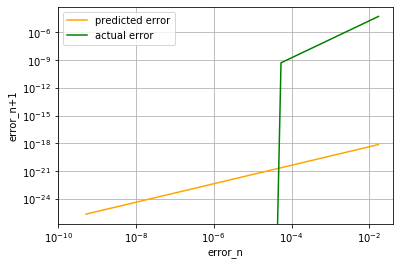

In [18]:
print("Let's continue with N = 3 iterattions") 
fixpoint(x0,3)

In [19]:
#we finally have an error other than zero
#we see they differantiate
#So we must find something else to predict the error with
#if it followed a relation of en+1 = k * (en^2) 
#So k = en+1/en^2

In [20]:
def fixpoint2(x0,N):
    solution =[x0]
    It = [0]
    for n in range (0,N):
        It.append(n+1)
        x0 = g1(x0)
        solution.append(x0)
    print("Iterations:", (len(It)-1), "while we were given:", N)
    print("Solutions:", (len(solution)-1))
    
    
    L = len(solution)
    root = solution[L-1]
    dgdx = g1g (root)
    print("The solution is:", root)
    print("Last Error:", solution[L-1]-solution[L-2])
    
    error_n = np.array([solution[L-1]-solution[0]])
    error_np1 = np.array([solution[L-1]-solution[1]])
    K = np.array([error_np1[0]/(error_n[0]**2)])
    
    for i in range (1,L-1):
        error_n = np.append(error_n, [solution[L-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[L-1]-solution[i+1]])
        K = np.append(K, [error_np1[i]/(error_n[i]**2)])
        
    le = len(K)
    k = 0
    for i in range(0,le-1):
        k = K[i]+k
        print(k)
    k = k/le
    print("k is:", k)

    error_np1_predict = k*(error_n**2)


    fig, ax = plt.subplots()
    ax.plot(abs(error_n), abs(error_np1_predict), label = "predicted error", color = "orange")
    ax.plot(abs(error_n),abs(error_np1), label="actual error", color = "green")
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.legend()
    ax.set(xlabel='error_n', ylabel='error_n+1')
   
    ax.grid()
    plt.show()

Iterations: 5 while we were given: 5
Solutions: 5
The solution is: 0.5671432904097838
Last Error: 0.0
0.1818913160736408
0.3628423748054659
415.5908638096348
415.5908638096348
k is: 83.11817276192696


C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


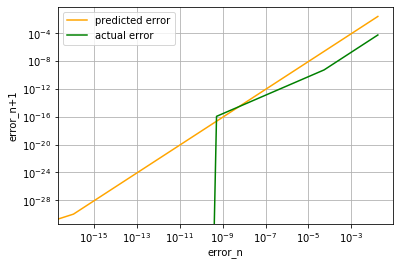

In [21]:
fixpoint2(x0,5)

In [22]:
#let's try solving our problem with Taylor series

In [23]:
def fixpoint3(x0,N):
    solution =[x0]
    It = [0]
    for n in range (0,N):
        It.append(n+1)
        x0 = g1(x0)
        solution.append(x0)
    print("Iterations:", (len(It)-1), "while we were given:", N)
    print("Solutions:", (len(solution)-1))
    
    
    L = len(solution)
    root = solution[L-1]
    dgdx = g1gg (root)
    print("The solution is:", root)
    print("Last Error:", solution[L-1]-solution[L-2])
    
    error_n = np.array([solution[L-1]-solution[0]])
    error_np1 = np.array([solution[L-1]-solution[1]])
    
    
    for i in range (1,L-1):
        error_n = np.append(error_n, [solution[L-1]-solution[i]])
        error_np1 = np.append(error_np1, [solution[L-1]-solution[i+1]])
    

    error_np1_predict = dgdx*(error_n**2)/2


    fig, ax = plt.subplots()
    ax.plot(abs(error_n), abs(error_np1_predict), label = "predicted error", color = "orange")
    ax.plot(abs(error_n),abs(error_np1), label="actual error", color = "green")
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.legend()
    ax.set(xlabel='error_n', ylabel='error_n+1')
   
    ax.grid()
    plt.show()

Iterations: 5 while we were given: 5
Solutions: 5
The solution is: 0.5671432904097838
Last Error: 0.0


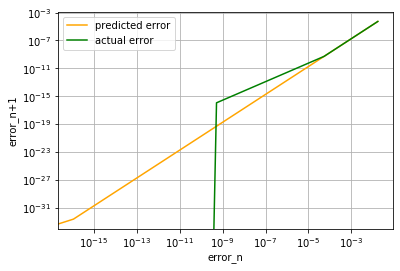

In [24]:
fixpoint3(x0,5)

Iterations: 5 while we were given: 5
Solutions: 5
The solution is: 0.5671432904097838
Last Error: 0.0


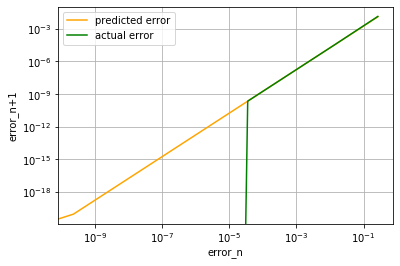

In [25]:
fixpoint3(0.3,5)
#Try again with a starting point further away from the root

# Άσκηση 2

In [26]:
#first we define our functions and their derivatives
def f2(x,y):
    f = (x**2)+(y**2)-3
    return f
def f2x(x,y):
    f = 2*x
    return f
def f2y(x,y):
    f = 2*y
    return f
def g2(x,y):
    g = 3*(x**2)-9*(y**2)-6
    return g
def g2x(x,y):
    g = 6*x
    return g
def g2y(x,y):
    g = -18*y
    return g


In [27]:
#Then we build our function for the two-way Newton Raphson method
#One of the variables shall be the desired error as we need it smaller than 10**(-12)
def newtraph(xo,yo,er):
    solutionx = [xo]
    solutiony = [yo]
    f = f2(xo,yo)
    g = g2(xo,yo)
    gy = g2y(xo,yo)
    gx = g2x(xo,yo)
    fy = f2y(xo,yo)
    fx = f2x(xo,yo)
    en = - (f*gy-g*fy)/(fx*gy-gx*fy)
    dn = - (g*fx-f*gx)/(fx*gy-gx*fy)
    xo = xo - (f*gy-g*fy)/(fx*gy-gx*fy)
    yo = yo - (g*fx-f*gx)/(fx*gy-gx*fy)
    solutionx.append(xo)
    solutiony.append(yo)
    i=0
    N = 1
    while i == 0:
        f = f2(xo,yo)
        g = g2(xo,yo)
        gy = g2y(xo,yo)
        gx = g2x(xo,yo)
        fy = f2y(xo,yo)
        fx = f2x(xo,yo)
        xo = xo - (f*gy-g*fy)/(fx*gy-gx*fy)
        en = - (f*gy-g*fy)/(fx*gy-gx*fy)
        solutionx.append(xo)
        yo = yo - (g*fx-f*gx)/(fx*gy-gx*fy)
        dn = - (g*fx-f*gx)/(fx*gy-gx*fy)     
        #we calculated the errors using the iterative relation. 
        #We could have used the simpler x_n - x_(n-1)
        solutiony.append(yo)
        N = N +1
        if abs(en) < er and abs(dn) < er:
            break
    
        
    print("The root shall be found at the point (",xo,",",yo,")")
    print("The error is ", er, " for the x and ", dn, " for the y")
    print("It took us ", N, " iterations to get here")
    

In [28]:
xo = 1
yo = 1
er = 10**(-12)
newtraph(xo,yo,er)

The root shall be found at the point ( 1.6583123951777 , 0.5 )
The error is  1e-12  for the x and  -5.551115123125777e-16  for the y
It took us  6  iterations to get here


We can clearly see that the solution is located in the first quadrand

In [29]:
#We try to solve the same problem with another method
#We will use the same variables
#For starters we need to create our x = h1(x,y) and y = h2(x,y) and then we'll need to check the convergence
#Here we define their derivatives
def h1(y):
    h = -y/np.sqrt(3-(y**2))
    return h
def h2(x):
    h = x/np.sqrt((3*(x**2))-6)
    return h
    


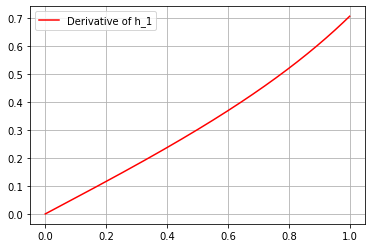

In [30]:

ypoints = np.linspace(0,1,1000)
h1points = abs(h1(ypoints))

plot1 = plt.plot(ypoints,h1points, color = 'red', label = "Derivative of h_1")

plt.grid(True)
plt.legend()
plt.show(plot1)


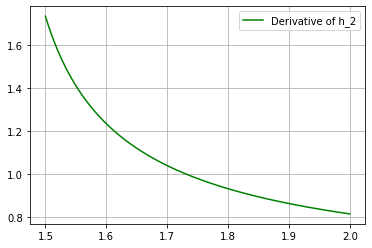

In [31]:
xpoints = np.linspace(1.5,2,1000)


h2points = abs(h2(xpoints))

plot2 = plt.plot(xpoints, h2points, color ='green', label ="Derivative of h_2")
plt.grid(True)
plt.legend()

plt.show(plot2)

In [32]:
#Let's try different functions
def h3(x):
    h = -x/np.sqrt(3-(x**2))
    return h
def h4(y):
    h = (3**(3/2))*y/np.sqrt(((9*(y**2))+6)/3)
    return h

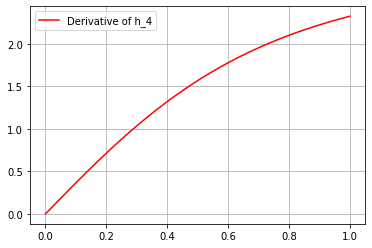

In [33]:
ypoints = np.linspace(0,1,1000)
h4points = abs(h4(ypoints))

plot4 = plt.plot(ypoints,h4points, color = 'red', label = "Derivative of h_4")

plt.grid(True)
plt.legend()
plt.show(plot4)

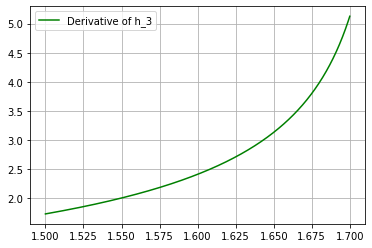

In [34]:
xpoints = np.linspace(1.5,1.7,1000)


h3points = abs(h3(xpoints))

plot3 = plt.plot(xpoints, h3points, color ='green', label ="Derivative of h_3")
plt.grid(True)
plt.legend()

plt.show(plot3)

Seems that we are unable to match the requirements of the method.
But we can try anyway

In [51]:
def fp (xo,yo,error):
    solutionx = [xo]
    solutiony = [yo]
    i = 0
    x =  np.sqrt(3-(yo**2))
    y =  np.sqrt((3*(x**2))-6)/3
    solutionx.append(x)
    solutiony.append(y)
    er = abs(x-xo)
    dr = abs(y-yo)
    #just so we have one function with the traditional calculating the error method
    xo = x
    yo = y
    i = i+1
    while error < er or error < dr:
        x =  np.sqrt(3-(yo**2))
        y =  np.sqrt((3*(x**2))-6)/3
        solutionx.append(x)
        solutiony.append(y)
        er = abs(x-xo)
        dr = abs(y-yo)
        xo = x
        yo = y
        i = i+1
    print("Our function followed this process:")
    
    L = len(solutionx)
    for k in range (0,L):
        print(solutionx[k],solutiony[k])
 
    print("\nFinally we reach the result: (",xo,",", yo,"), after", i, "iterations" )
    print("The errors in the x and y are accordingly:", er, "and", dr)
    

In [52]:
fp(1.8,1,10**(-12))

Our function followed this process:
1.8 1
1.4142135623730951 1.4048949503631345e-08
1.7320508075688772 0.5773502691896256
1.632993161855452 0.47140452079103173
1.6666666666666667 0.5091750772173156
1.6555182695279265 0.49690399499995297
1.659242724785342 0.501027750313655
1.6580021693036586 0.49965694678637185
1.6584157909065267 0.5001142987784961
1.6582779285021234 0.4999618946004098
1.6583238839103682 0.5000127011545367
1.6583085655824563 0.49999576621012315
1.6583136717074825 0.5000014112553256
1.6583119696675541 0.49999952958067295
1.658312537014391 0.500000156806344
1.6583123478988002 0.49999994773120765
1.6583124109373328 0.5000000174229295
1.658312389924489 0.4999999941923568
1.6583123969287703 0.5000000019358811
1.6583123945940097 0.499999999354706
1.6583123953722634 0.500000000215098
1.6583123951128453 0.4999999999283007
1.658312395199318 0.5000000000238994
1.658312395170494 0.49999999999203343
1.658312395180102 0.5000000000026554
1.6583123951768992 0.49999999999911476
1.65831

I am not entirely sure why we got this 0.4999999... and yet the error is still so small. Nor do I know why it worked while the error was not supposed to converge. Perhaps it is cause I entwined the two equations of calculating the xs and ys.

In [53]:
#Let's try the same with more iterations just to see what happens
def fp2 (xo,yo,N):
    solutionx = [xo]
    solutiony = [yo]
    i = 0
    while i<N:
        x =  np.sqrt(3-(yo**2))
        y =  np.sqrt((3*(x**2))-6)/3
        solutionx.append(x)
        solutiony.append(y)
        er = abs(x-xo)
        dr = abs(y-yo)
        xo = x
        yo = y
        i = i+1
    print("Our function followed this process:")
    L = len(solutionx)
    for k in range (0,L):
        print(solutionx[k],solutiony[k])
        
    print("\nFinally we reached the result: (",xo,",", yo,"), after", i, "iterations" )
    print("The errors in the x and y are accordingly:", er, "and", dr)
    

In [54]:
fp2(1.9,0.3,50)

Our function followed this process:
1.9 0.3
1.705872210923198 0.5507570547286103
1.6421530582338135 0.4818944098266987
1.663663961795704 0.5058912194592095
1.65652469769517 0.498020774022555
1.6589078662306642 0.5006580032457203
1.6581138573047414 0.49978047306992984
1.6583785691867816 0.5000731542277915
1.658290336587857 0.49997561287882425
1.6583197479757767 0.5000081287760708
1.658309944237763 0.49999729037860857
1.658313212156874 0.5000009032038674
1.6583121228512192 0.49999969893168167
1.6583124859531835 0.5000001003560658
1.6583123649192042 0.49999996654797335
1.6583124052638651 0.5000000111506752
1.6583123918156448 0.4999999962831081
1.658312396298385 0.5000000012389642
1.6583123948041383 0.4999999995870121
1.6583123953022205 0.5000000001376627
1.658312395136193 0.49999999995411254
1.6583123951915355 0.5000000000152959
1.658312395173088 0.49999999999490147
1.6583123951792371 0.5000000000016994
1.6583123951771874 0.49999999999943334
1.6583123951778709 0.5000000000001891
1.6583123

# Ασκηση 3

In [103]:
def hilbert():
    M=[]
    #now, our problem arises from the fact that we start counting from 1 in matrices while the computer begins at 0
    #so we define k and l to diferentiate the two
    for k in range(0,10):
        i = k+1
        M.append([])
        for l in range(0,10):
            j = l+1
            m = 1/(i+j-1)
            M[k].append(m)
            #now we should not have an M[i] = 1/0
        print(M[k])
    return M
    

In [104]:
A = hilbert()


[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]
[0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091]
[0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333]
[0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693]
[0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142]
[0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]
[0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.0769230769230

Yes this should be fine. Now for the x

In [94]:
def T():
    xt=[]
    for i in range(0,10):
        xt.append(10-i)
        print(xt[i])
    return xt

In [95]:
xt = T()

10
9
8
7
6
5
4
3
2
1


alright. Now we need to multiply them.

In [143]:
def multiplication(A,xt,n):
    #We could make this function to fit any matrix. We'll need it for problem no 4
    b = []
    for i in range (0,n):
        k = 0
        for j in range(0,n):
            a = A[i][j]
            x = xt[j]
            k = k +a*x
        b.append(k)
        print(b[i])
    return b

In [144]:
b = multiplication(A,xt,10)

22.218650793650795
14.238528138528139
10.841738816738818
8.855205905205905
7.523434898434898
6.558330558330558
5.822392884892885
5.240516836105071
4.767767771444241
4.375428063508559


Alright. Those are our matrices.

Now we have to FIND the x matrix, knowing A and b. 

We are tasked to do this using the Gauss method            

In [175]:
def Gauss(Matrix,co,roots,n):
    
    sol = np.zeros(n)
    #this is for storing the solutions
    #According to our book, we need to create an augmented matrix
    a = np.zeros((n,n+1))
    
    for i in range(0,n):
        for j in range(0,n):
            a[i][j] = Matrix[i][j]
    for i in range(0,n):
        a[i][n] = co[i]
        
    for i in range(0,n):
        if Matrix[i][i] == 0:
            
            #This is dividing by zero. We can't do this.
            break
        
        for j in range(i+1, n):
            
            #let's fix the matrix up a little
            r = a[j][i]/a[i][i]
        
            for k in range(0,n+1):
                a[j][k] = a[j][k] - r * a[i][k]
                
    sol[n-1] = a[n-1][n]/a[n-1][n-1]
    #basically this is the xn = bn/ann
    #now we will go backwards (a is now an upper trigonal matrix)
    for i in range(n-2,-1,-1):
        sol[i] = a[i][n]
    
        for j in range(i+1,n):
            sol[i] = sol[i] - a[i][j]*sol[j]
    
        sol[i] = sol[i]/a[i][i]
    
        
    #Now let's find the error:
    
    val = 0
    for i in range(0,n):
        val = val + roots[i]
    er = []
    for i in range(0,n):
        error = abs(roots[i]-sol[i])
        error = error/val
        er.append(error)
        
        
    print('The required solution is: ')
    for i in range(0,n):
        print('x',i+1,'=', (sol[i]), "with an error of:", er[i])

In [176]:
Gauss(A,b,xt,10)

The required solution is: 
x 1 = 10.000000004544424 with an error of: 8.26258818940253e-11
x 2 = 8.999999619822592 with an error of: 6.912316505039681e-09
x 3 = 8.000007897029016 with an error of: 1.4358234575437027e-07
x 4 = 6.999929649211058 with an error of: 1.2791052534892474e-06
x 5 = 6.000329956990854 with an error of: 5.9992180155338755e-06
x 6 = 4.999105790301797 with an error of: 1.6258358149153068e-05
x 7 = 4.001449253267286 with an error of: 2.6350059405205236e-05
x 8 = 2.9986143221386694 with an error of: 2.519414293328349e-05
x 9 = 2.00072068131341 with an error of: 1.3103296607453918e-05
x 10 = 0.9998428230017828 with an error of: 2.8577636039483036e-06


# Άσκηση 4

In [177]:
A2=[]
xt2 = []
import random as rd
for i in range (0,50):
    A2.append([])
    xt2.append(1)
    for j in range (0,50):
        A2[i].append(rd.random())
A2


[[0.45230867930194085,
  0.23077842212857336,
  0.012135706723356843,
  0.7623827390695496,
  0.3369130308374281,
  0.17930809953999094,
  0.9863563653546024,
  0.4268146783890432,
  0.2650574360895167,
  0.7148960571312793,
  0.7519582730604778,
  0.4521560175962457,
  0.6253186658304105,
  0.5586497380437405,
  0.40314694054261924,
  0.3681960995298499,
  0.06704159827108802,
  0.6960053684226634,
  0.52535982865532,
  0.27700748338469317,
  0.3957008489664634,
  0.4669835185752237,
  0.11434723056594676,
  0.45732348196039585,
  0.18594710052266505,
  0.8046418272672143,
  0.5865284323958041,
  0.4507351401329579,
  0.019826618215071812,
  0.18795293879086905,
  0.9101954699046355,
  0.1594471607803868,
  0.08756661286936529,
  0.03553674264585904,
  0.9395987451345164,
  0.42058457422764195,
  0.6115234031539364,
  0.3212191327872298,
  0.8821212113885689,
  0.6134864331349615,
  0.6603136042055672,
  0.5217158436653231,
  0.7359195339912393,
  0.29238117553157217,
  0.363152833445

In [178]:
b2 = multiplication(A2,xt2,50)

22.1389402330156
26.685768484807014
26.089612428486934
24.13752460360983
25.380504945610816
27.10718322468829
27.6017854940408
24.39160233378423
22.824615267124265
24.030509693038347
24.891921840020288
23.279393849358346
25.29261016519616
22.154794585596395
20.4093104116868
27.45754432295036
23.80480859738116
22.50629611148229
23.060629011716923
26.967813881671937
30.990002826943545
26.294257555837383
28.596348721196435
26.491885009972442
25.05749047821308
21.503290307818816
23.40554170806537
24.517309044181744
27.316906812483005
22.195748474943116
23.502324561826985
26.182214796733433
24.52151214990115
20.945304170932964
24.140457290184543
21.2838784447913
23.8056774304154
25.911502288785535
24.496032373732138
21.8802851345553
25.15094689900437
27.69671008255579
27.17793001498956
24.67554118810083
25.319783969760397
29.473539596725956
27.678416881319443
25.667329630341037
24.887723819840048
26.33251641339417


In [179]:
Gauss(A2,b2,xt2,50)

The required solution is: 
x 1 = 0.9999999999999357 with an error of: 1.2856382625159313e-15
x 2 = 0.9999999999992801 with an error of: 1.439737218333903e-14
x 3 = 1.0000000000016136 with an error of: 3.227196287980405e-14
x 4 = 0.9999999999976853 with an error of: 4.629407968081978e-14
x 5 = 1.0000000000006224 with an error of: 1.2447820552097256e-14
x 6 = 1.000000000001227 with an error of: 2.454036973631446e-14
x 7 = 0.9999999999995455 with an error of: 9.090506125630781e-15
x 8 = 1.000000000000243 with an error of: 4.858335955759685e-15
x 9 = 0.9999999999960527 with an error of: 7.894573883504564e-14
x 10 = 1.0000000000033245 with an error of: 6.648903649875137e-14
x 11 = 0.9999999999990968 with an error of: 1.8063328610651296e-14
x 12 = 1.0000000000013662 with an error of: 2.7324809082074353e-14
x 13 = 1.0000000000004605 with an error of: 9.210410212290298e-15
x 14 = 1.000000000000277 with an error of: 5.537792446830281e-15
x 15 = 0.9999999999998347 with an error of: 3.30624416733

And thus we conclude our problem set